In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
# folder_path = "../input/ckplus/CK+48/" 
# validation_folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/"
# folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/" 
# folder_path = "../input/dataset-1-modified/dataset(1) - modified/images/" 
folder_path = "../input/dataset3modified/dataset(3) - modified/images/" 
test="/kaggle/input/dataset-1-modified/dataset(1) - modified/images/images/train"
# folder_path = "../input/face-expression-recognition-dataset/images/"
# validation_folder_path = "../input/face-expression-recognition-dataset/images/"

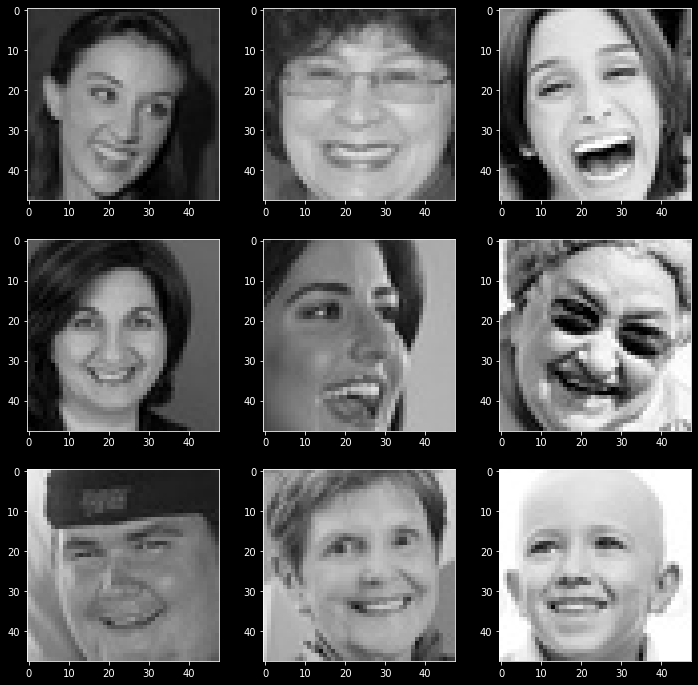

In [3]:
expression = 'happy'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
#     img = load_img(folder_path+"train/"+expression+"/"+
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(test,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 58454 images belonging to 7 classes.
Found 28821 images belonging to 7 classes.


In [5]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.22))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [6]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 30

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/30
456/456 [==============================] - 222s 466ms/step - loss: 1.6301 - accuracy: 0.3723 - val_loss: 1.3752 - val_accuracy: 0.4798
Epoch 2/30
456/456 [==============================] - 69s 151ms/step - loss: 1.2396 - accuracy: 0.5258 - val_loss: 1.2306 - val_accuracy: 0.5389
Epoch 3/30
456/456 [==============================] - 65s 142ms/step - loss: 1.1196 - accuracy: 0.5767 - val_loss: 1.0555 - val_accuracy: 0.5854
Epoch 4/30
456/456 [==============================] - 64s 141ms/step - loss: 1.0342 - accuracy: 0.6089 - val_loss: 0.9544 - val_accuracy: 0.6397
Epoch 5/30
456/456 [==============================] - 76s 166ms/step - loss: 0.9630 - accuracy: 0.6374 - val_loss: 0.9304 - val_accuracy: 0.6472
Epoch 6/30
456/456 [==============================] - 85s 187ms/step - loss: 0.8943 - accuracy: 0.6651 - val_loss: 0.8383 - val_accuracy: 0.6903
Epoch 7/30
456/456 [==============================] - 79s 174ms/step - loss: 0.8293 - accuracy: 0.6925 - val_loss: 0.8717 - val_a

In [9]:
model.save('/kaggle/working/emotion.h5')


In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
test_set_labels = test_set.classes

# Ensure the number of steps covers the entire dataset
steps = np.ceil(test_set.n / test_set.batch_size)

# Get predictions for the entire test set
predictions = model.predict(test_set, steps=steps, verbose=1)

# Convert predictions to class labels (argmax to get the class with the highest probability)
predictions = np.argmax(predictions, axis=1)

# Ensure that predictions and test_set_labels have the same length
if len(predictions) > len(test_set_labels):
    predictions = predictions[:len(test_set_labels)]
elif len(predictions) < len(test_set_labels):
    test_set_labels = test_set_labels[:len(predictions)]

# Calculate the F1 Score
f1 = f1_score(test_set_labels, predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate the Confusion Matrix
conf_matrix = confusion_matrix(test_set_labels, predictions)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_set.class_indices.keys(), 
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(test_set_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

# Predict the labels for the test set
test_set_labels = test_set.classes

# Ensure the number of steps covers the entire dataset
steps = np.ceil(test_set.n / test_set.batch_size)

# Get predictions for the entire test set
predictions = model.predict(test_set, steps=steps, verbose=1)

# Convert predictions to class labels (argmax to get the class with the highest probability)
predictions = np.argmax(predictions, axis=1)

# Ensure predictions and labels match in size
predictions = predictions[:len(test_set_labels)]
test_set_labels = test_set_labels[:len(predictions)]

# Generate the classification report
class_report = classification_report(test_set_labels, predictions, digits=2)

# Print the classification report
print("Model Classification Report\n")
print(class_report)

# Calculate F1 Score
f1 = f1_score(test_set_labels, predictions, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Calculate Accuracy
accuracy = accuracy_score(test_set_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(test_set_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_set.class_indices.keys(), 
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
